In [1]:
import healpy as hp
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import astropy.units as u

# White noise NET in Radio-astronomy and Cosmology
> Create a white noise map and compare with power spectrum expected from the NET
- categories: [cosmology, python, healpy]

Noise-Equivalent-Temperature, it is a measure of sensitivity of a detector, in cosmology, it is often quoted
in $\mu K \sqrt(s)$, i.e. it is the sensitivity per unit time and can be divided by the integration time to
get the actual standard deviation of the white noise of the instrument.

For example let's consider a white noise NET of $200 \mu K \sqrt(s)$

it means that if you integrate for 100 seconds for each pixel, the standard deviation will be $20 \mu K$.

In [2]:
net = 200 * u.Unit("uK * sqrt(s)")

In [3]:
net

<Quantity 200. s(1/2) uK>

In [4]:
integration_time_per_pixel = 100 * u.s

In [5]:
standard_deviation = net / np.sqrt(integration_time_per_pixel)

## Create a white noise map

Now that we have an estimate of the standard deviation per pixel, we can use `numpy` to create a map of gaussian white noise.

In [6]:
nside = 128
npix = hp.nside2npix(nside)

In [7]:
m = np.random.normal(scale = standard_deviation.value, size=npix) * standard_deviation.unit

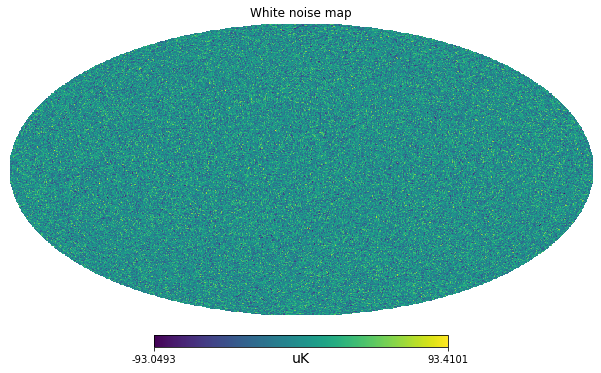

In [8]:
hp.mollview(m, unit=m.unit, title="White noise map")

## Power spectrum

Finally we can compute the angular power spectrum with `anafast`, i.e. the power as a function of the angular scales, from low $\ell$ values for large angular scales, to high $\ell$ values for small angular scales.

At low $\ell$ there is not much statistics and the power spectrum is biased, but if we exclude lower ells, we can have an estimate of the white noise $C_\ell$ coefficients. We can then compare with the theoretical power computed as:

$$ C_\ell = \Omega_{pix}\sigma $$

Where: $\Omega_{pix}$ is the pixel are in square-radians and $\sigma$ is the white noise standard deviation.

In [9]:
cl = hp.anafast(m)

In [10]:
cl[100:].mean()

0.02527702881921304

In [11]:
pixel_area = hp.nside2pixarea(nside)

In [12]:
white_noise_cl = standard_deviation.value**2 * pixel_area

In [13]:
white_noise_cl

0.025566346464760685

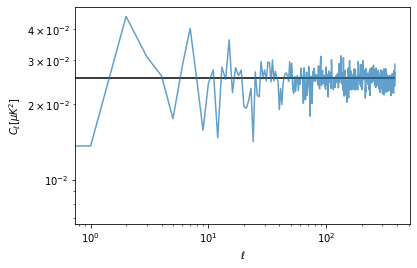

In [14]:
plt.figure(figsize=(6,4))
plt.loglog(cl, label="Map power spectrum", alpha=.7)
plt.hlines(white_noise_cl, 0, len(cl), label="White noise level")
plt.xlabel("$\ell$")
plt.ylabel("$C_\ell [\mu K ^ 2]$");